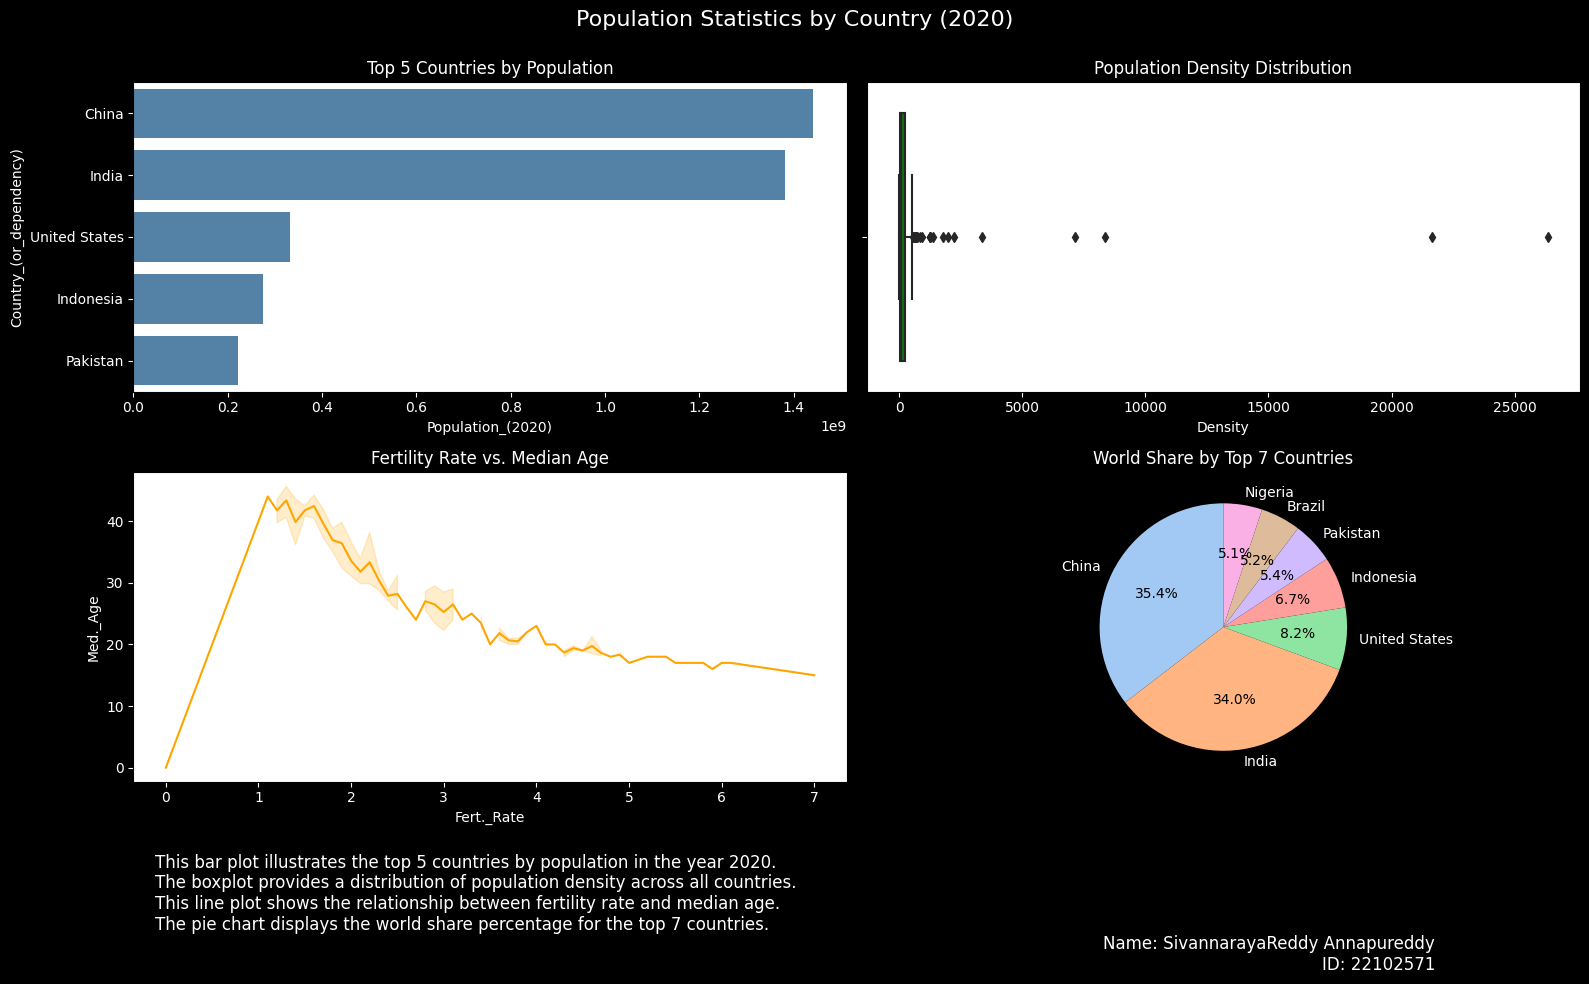

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("population_by_country_2020.csv")

# Remove spaces in column names
df.columns = df.columns.str.replace(' ', '_')

# Remove spaces in data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace '%' with an empty string
df = df.replace('%', '', regex=True)

# Convert numeric columns to appropriate data types
numeric_cols = ['Population_(2020)', 'Yearly_Change', 'Net_Change', 'Density', 'Land_Area',
                'Migrants_(net)', 'Fert._Rate', 'Med._Age', 'Urban_Pop_%', 'World_Share']

# Handle non-ASCII characters in column names
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('ascii')

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Replace null values with 0
df = df.fillna(0)

# Compute summary statistics
summary_stats = df.describe()

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 10), facecolor='black')
fig.suptitle("Population Statistics by Country (2020)", fontsize=16, color='white')

# Plot 1: Bar plot of the top 5 countries by population
top5_countries = df.nlargest(5, 'Population_(2020)')
sns.barplot(x='Population_(2020)', y='Country_(or_dependency)', data=top5_countries, ax=axes[0, 0], color='steelblue')  # Change color
axes[0, 0].set_title('Top 5 Countries by Population', color='white')
axes[0, 0].xaxis.label.set_color('white')  # Set x-axis label color
axes[0, 0].yaxis.label.set_color('white')  # Set y-axis label color

# Show x-axis and y-axis
axes[0, 0].tick_params(axis='x', colors='white')  # Set x-axis tick color
axes[0, 0].tick_params(axis='y', colors='white')  # Set y-axis tick color


# Plot 2: Boxplot of population density
sns.boxplot(x='Density', data=df, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Population Density Distribution', color='white')
axes[0, 1].xaxis.label.set_color('white')  # Set x-axis label color
axes[0, 1].yaxis.label.set_color('white')  # Set y-axis label color

# Show x-axis and y-axis
axes[0, 1].tick_params(axis='x', colors='white')  # Set x-axis tick color
axes[0, 1].tick_params(axis='y', colors='white')  # Set y-axis tick color

# Plot 3: Line plot of fertility rate vs. median age
sns.lineplot(x='Fert._Rate', y='Med._Age', data=df, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Fertility Rate vs. Median Age', color='white')
axes[1, 0].xaxis.label.set_color('white')  # Set x-axis label color
axes[1, 0].yaxis.label.set_color('white')  # Set y-axis label color

# Show x-axis and y-axis
axes[1, 0].tick_params(axis='x', colors='white')  # Set x-axis tick color
axes[1, 0].tick_params(axis='y', colors='white')  # Set y-axis tick color


# Plot 4: Pie chart of world share percentage for top 7 countries
top7_countries = df.nlargest(7, 'World_Share')
colors = sns.color_palette('pastel')
wedges, texts, autotexts = axes[1, 1].pie(top7_countries['World_Share'], labels=top7_countries['Country_(or_dependency)'], autopct='%1.1f%%', startangle=90, colors=colors)  # Change color

for text in texts:
    text.set_color('white')

for autotext in autotexts:
    autotext.set_color('black')

axes[1, 1].set_title('World Share by Top 7 Countries', color='white')


plt.tight_layout(rect=[0, 0.15, 1, 0.98])

plt.figtext(0.9, 0.02, "Name: SivannarayaReddy Annapureddy\nID: 22102571", ha="right", fontsize=12, color='white')

description_text = """
This bar plot illustrates the top 5 countries by population in the year 2020.
The boxplot provides a distribution of population density across all countries.
This line plot shows the relationship between fertility rate and median age.
The pie chart displays the world share percentage for the top 7 countries."""

plt.figtext(0.1, 0.06, description_text, fontsize=12, color='white')

# show
plt.show()